<a href="https://colab.research.google.com/github/bala-codes/URL-CATEGORY-CLASSIFIER-USING-MACHINE-LEARNING-NLP/blob/master/codes/1.%20URL%20Category%20Classifier%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
import pickle
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#  HERE I AM USING MY OWN CSV FILE, IF YOU HAVE YOU OWN FILE (.CSV) FORMAT , GIVE THE BELOW DF INPUT AS YOUR FILE INPUT.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Source Codes and Datasets/URL Classification.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,URL,SECTION
0,http://www.onlineanime.org/,Adult
1,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
2,http://www.galeon.com/kmh/,Adult
3,http://www.fanworkrecs.com/,Adult
4,http://www.animehouse.com/,Adult


In [ ]:
# Splitting the dataframe

df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]

dtest=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)

df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,SECTION
1048570,https://www.nucleics.com/peaktrace/,Science
1048571,http://www.phenosystems.com,Science
1048572,http://www.thebiolog.com,Science
1048573,http://code.google.com/p/openbiomind/,Science
1048574,http://va-genex.sourceforge.net/,Science


In [ ]:
# Removing Adult owing to college project reason and poor dataset collection for adult websites 
df = df[df.SECTION != 'Adult']
dtest = dtest[dtest.SECTION != 'Adult']

In [ ]:
print(df.shape)
print(dtest.shape)

(991251, 2)
(22000, 2)


Text(0, 0.5, 'Total Number Of Individual Section for Training')

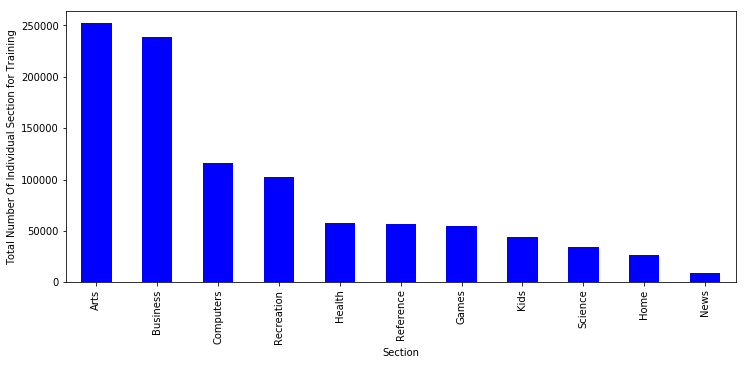

In [ ]:
df.SECTION.value_counts().plot(figsize=(12,5),kind='bar',color='blue');
plt.xlabel('Section')
plt.ylabel('Total Number Of Individual Section for Training')

Text(0, 0.5, 'Total Number Of Individual Section for Training')

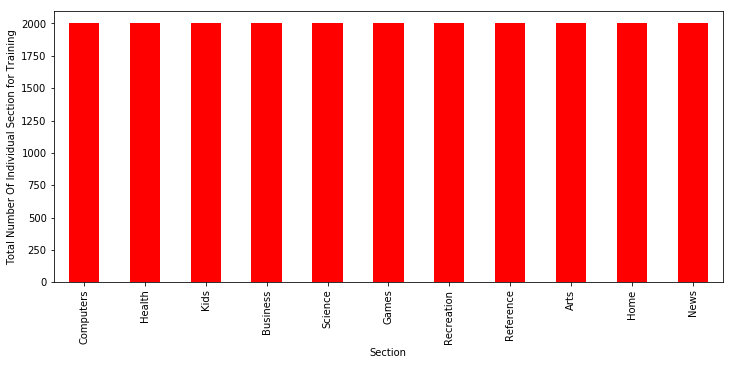

In [ ]:
dtest.SECTION.value_counts().plot(figsize=(12,5),kind='bar',color='red');
plt.xlabel('Section')
plt.ylabel('Total Number Of Individual Section for Training')

In [ ]:
df.groupby("SECTION").describe()
dtest.groupby("SECTION").describe()

URL                                                               
           count unique                                                top freq
SECTION                                                                        
Arts        2000   1992  http://www.lib.virginia.edu/dic/colls/arh102/i...    2
Business    2000   1997                        http://www.aaatrucking.com/    2
Computers   2000   1959                          http://www.topdatapro.com    3
Games       2000   1992     http://www.erikthecat.btinternet.co.uk/arcade/    2
Health      2000   1997  http://islandreikimaster.homestead.com/islandr...    2
Home        2000   1995  http://www.thecarconnection.com/vehicle_review...    2
Kids        2000   1998                             http://www.dwkids.com/    2
News        2000   1985                      http://www.newsombudsmen.org/    2
Recreation  2000   1983                http://people.smu.edu/acambre/nova/    2
Reference   2000   1985  http://www.lanka.info/dictionary/englishtosinh...    2
Science     2000   1990                     http://edis.ifas.ufl.edu/ng032    2

# IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS

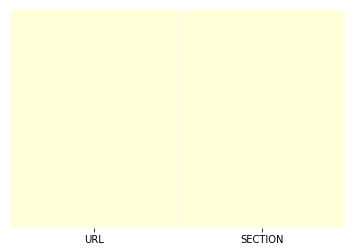

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

# HERE WE DROP ALL THE DUPLICATES ROWS IF EXISTS IN THE DATAFRAME

In [ ]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

dtest.drop_duplicates(inplace = True)
dtest.dropna(inplace=True)

print(df.shape)
print(dtest.shape)

(978219, 2)
(21873, 2)


# THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE 

In [ ]:
def cleaner(text):
  Segments = text.replace('http://',"") 
  Segments = Segments.replace('www',"") 
  Segments = re.sub(r".com[/]"," ",Segments) 
  Segments = re.sub(r".com"," ",Segments) 
  x = re.sub(r"['!#$%&\'()*+,-./:;<=>?@//\\^_`{|}~']",' ',Segments)

  return x

print(cleaner('http://engbishoujo.tripod.com'))

engbishoujo tripod 


In [ ]:
df['url_cleaned'] = df['URL'].apply(cleaner)
dtest['url_cleaned'] = dtest['URL'].apply(cleaner)

df['section_enc'] = df['SECTION'].replace(to_replace = ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'], value = [0,1,2,3,4,5,6,7,8,9,10])
dtest['section_enc'] = dtest['SECTION'].replace(to_replace = ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'], value = [0,1,2,3,4,5,6,7,8,9,10])

df.to_csv("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Source Codes and Datasets/urlcleaned.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 
dtest.to_csv("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Source Codes and Datasets/urlcleaned-test.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Source Codes and Datasets/urlcleaned.csv",usecols = ['URL','url_cleaned','SECTION'])
dtest = pd.read_csv("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Source Codes and Datasets/urlcleaned-test.csv", usecols = ['URL','url_cleaned','SECTION'])
df = pd.DataFrame(df)
dtest = pd.DataFrame(dtest)

def word_count(sentence):
  return len(sentence.split())

df['word count'] = df['URL'].apply(word_count)


In [ ]:
import matplotlib.pyplot as plt
print(pd.unique(df['SECTION']))

a2 = df['word count'][df.SECTION == 'Arts']
a3 = df['word count'][df.SECTION == 'Business']
a4 = df['word count'][df.SECTION == 'Computers']
a5 = df['word count'][df.SECTION == 'Games']
a6 = df['word count'][df.SECTION == 'Health']
a7 = df['word count'][df.SECTION == 'Home']
a8 = df['word count'][df.SECTION == 'Kids']
a9 = df['word count'][df.SECTION == 'News']
a10 = df['word count'][df.SECTION == 'Recreation']
a11 = df['word count'][df.SECTION == 'Reference']
a12 = df['word count'][df.SECTION == 'Science']

['Arts' 'Business' 'Computers' 'Games' 'Health' 'Home' 'Kids' 'News'
 'Recreation' 'Reference' 'Science']


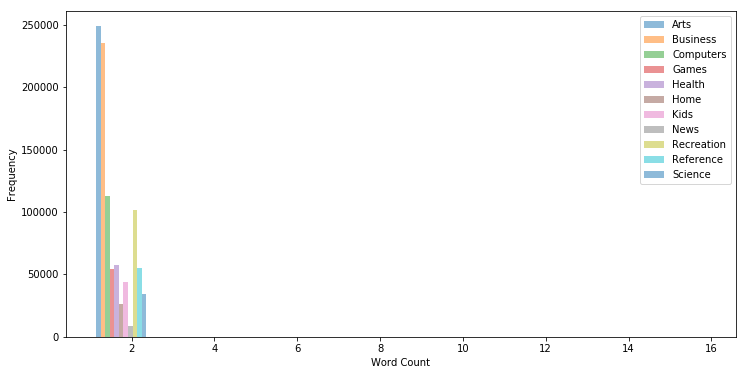

In [ ]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g = plt.hist([a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12], alpha = 0.5,label = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
df['url_cleaned'] = df['url_cleaned'].astype(str)
df['URL'] = df['URL'].astype(str)

dtest['url_cleaned'] = dtest['url_cleaned'].astype(str)
dtest['URL'] = dtest['URL'].astype(str)

In [ ]:
# Displaying the most common words in the dataset
import collections
all_words = []

for line in list(df['url_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('html', 119794),
 ('org', 96398),
 ('htm', 62671),
 ('uk', 52307),
 ('edu', 50836),
 ('net', 49204),
 ('co', 44324),
 ('geocities', 35906),
 ('index', 28198),
 ('amp', 20492)]

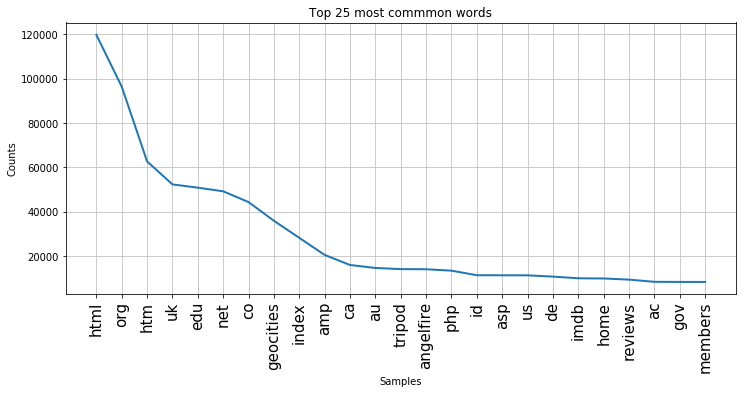

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


In [ ]:
!pip install WordCloud

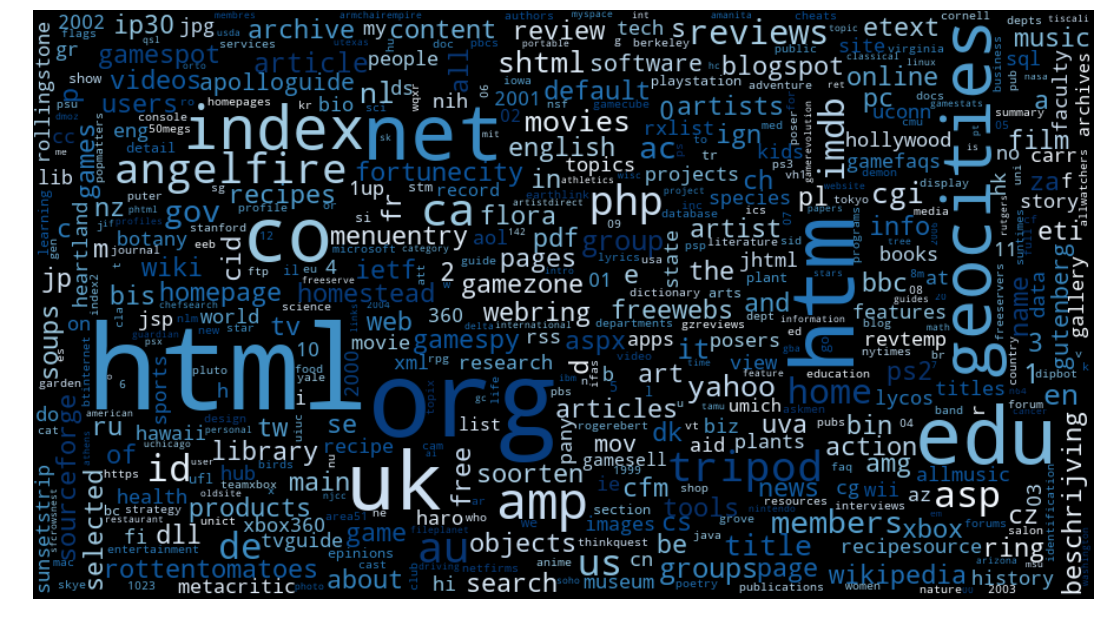

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(df['url_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['URL'],df['SECTION'],test_size=0.5,random_state=87)'''

# Try the same for df['url_cleaned] and dtest['url_cleaned']

X_train=df['URL']
y_train=df['SECTION']

X_test=dtest['URL']
y_test=dtest['SECTION']

# TFIDF VECTORIZER 

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Also try for ngram_range = (1,1),(1,2),(1,3)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)

#this command gives importance measure for each and every word
print(tfidf_train[0:3])

  (0, 3939845)	0.4507980586720345
  (0, 3939844)	0.4507980586720345
  (0, 3854591)	0.05134420720497528
  (0, 1794393)	0.4507980586720345
  (0, 1754466)	0.05141006662919398
  (0, 1584227)	0.04204995880052983
  (0, 699003)	0.05956894971294106
  (0, 391343)	0.4357450226469719
  (0, 391342)	0.4357450226469719
  (1, 1592995)	0.4468038798683829
  (1, 1592994)	0.41776896468720265
  (1, 1584227)	0.031724430233593184
  (1, 699003)	0.04494156577468057
  (1, 284524)	0.4468038798683829
  (1, 284523)	0.4468038798683829
  (1, 284520)	0.34010286739210804
  (1, 169527)	0.23756322717957182
  (1, 169371)	0.22679404715210058
  (2, 4756420)	0.4456761765174639
  (2, 4756419)	0.4456761765174639
  (2, 3854591)	0.04132405724519482
  (2, 3597019)	0.4456761765174639
  (2, 3597018)	0.4456761765174639
  (2, 2179594)	0.4456761765174639
  (2, 1754466)	0.04137706378214814
  (2, 1584227)	0.033843640777119585
  (2, 699003)	0.04794368872317839


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



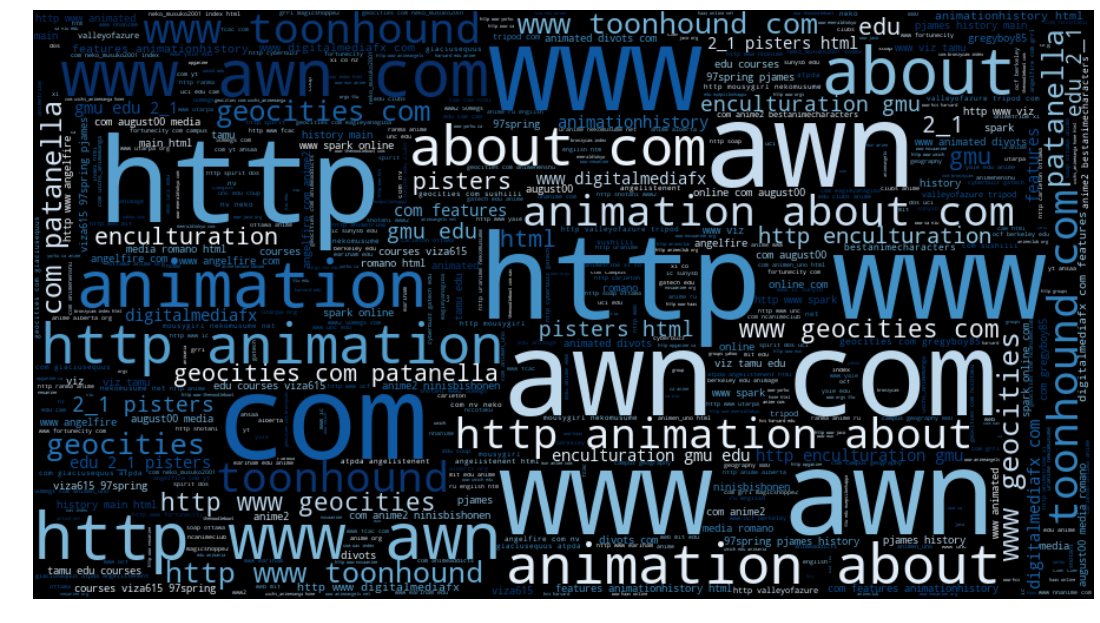

In [ ]:
all_words = []
print(tfidf_vectorizer.vocabulary_)
for k,v in (tfidf_vectorizer.vocabulary_).items():
  all_words.append(k)


wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# In the next code , kindly check the alpha values for which you get more accuracy and provide that accuracy in the hyperparameter section of our Naive Bayes model

# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER ngram range = (1,3)  CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=0.0)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + Naive Bayes :", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)



Score from TFIDF Vectorizer + Naive Bayes : 97.682 %

[[1885    2    0    0    1   10   64    0    2   28    0]
 [   0 1990    3    0    1    0    0    0    3    0    0]
 [   0    5 1942    1    0    3    3    2    0    3    0]
 [   0    1    1 1984    0    1    2    0    0    3    0]
 [   0    0    0    0 1990    2    2    0    0    2    1]
 [   2    1    9    0    5 1969    1    2    5    1    0]
 [ 161    0   19   34    0    3 1771    1    3    5    1]
 [  11    0    1    0    1    3    1 1942    0   26    0]
 [   0    1    0    0    0    1    0    0 1979    2    0]
 [   1    0    3    1    3    1   10    5    0 1958    3]
 [   0    3    0    0    0   19    1    0    0   11 1956]]


In [ ]:
%%time 
# Create the list of alphas: alphas for tfidf
import numpy as np

#alphas = np.arange(0, 0.1, 0.01)
alphas = [0.01, 0.001, 0.1, 0.0001, 0.00001]

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.01
Score:  0.9607735564394458

Alpha:  0.001
Score:  0.9734375714351027

Alpha:  0.1
Score:  0.8878983221323092

Alpha:  0.0001
Score:  0.9759063685822704

Alpha:  1e-05
Score:  0.9765464271019064

CPU times: user 28 s, sys: 397 ms, total: 28.4 s
Wall time: 28.4 s


In [ ]:
# Saving the Naive Bayes model along with best hyperparamters 

best_params = {'alpha': 0.0}
nb_classifier = MultinomialNB(**best_params)
nb_classifier.fit(tfidf_train,y_train)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# Bernoulli's Bayes

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.0)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + Bernoulli's Bayes :", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)



Score from TFIDF Vectorizer + Bernoulli's Bayes : 97.074 %

[[1882    2    1    0    1   10   64    0    3   29    0]
 [   0 1991    1    0    1    0    0    0    4    0    0]
 [   0   40 1903    0    0    4    2    2    3    5    0]
 [   0    8    2 1974    0    1    2    0    1    4    0]
 [   0    0    0    0 1989    2    1    0    1    3    1]
 [   2    3   12    0    6 1960    1    2    8    1    0]
 [ 176    0   28   37    1    6 1732    1    5   12    0]
 [   4    0    0    0    1    4    1 1950    0   25    0]
 [   0    2    0    0    0    3    0    0 1978    0    0]
 [   0    2    5    0    3    1    7    5    2 1957    3]
 [   0   17    1    0    2   25    1    0    3   24 1917]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

#alphas = np.arange(0, 1, 0.1)
alphas = [0.0,0.1,0.01,0.001,0.001,0.0001]

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.9707401819594934

Alpha:  0.1
Score:  0.7844374342797056

Alpha:  0.01
Score:  0.9535500388606958

Alpha:  0.001
Score:  0.9653454030082751

Alpha:  0.001
Score:  0.9653454030082751

Alpha:  0.0001
Score:  0.9677684816897545



In [ ]:
# Saving the Bernoulli's Bayes model along with best hyperparamters 

best_params = {'alpha': 0.0} 
bb_classifier = BernoulliNB(**best_params)
bb_classifier.fit(tfidf_train,y_train)

with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/bb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, bb_classifier), fout) 

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=350)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + PAC : ", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)


Score from TFIDF Vectorizer + PAC :  96.749 %

[[1960    4    0    0    0    7   16    0    2    3    0]
 [   0 1995    1    0    0    0    0    0    1    0    0]
 [   2   15 1937    0    1    1    0    1    0    2    0]
 [   1    2    0 1989    0    0    0    0    0    0    0]
 [   0    0    0    0 1995    0    1    0    1    0    0]
 [   2    4    8    1    2 1972    1    0    5    0    0]
 [ 334    0   28   36    1    2 1588    1    3    4    1]
 [  30   21    4    0    1    2    1 1855    0   70    1]
 [   0    5    0    0    0    0    0    0 1978    0    0]
 [  12    3   12    2    1    0   10    1    2 1936    6]
 [   0    9    0    0    0   13    0    0    1   10 1957]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,500,600,800]

# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.968637132537832

Alpha:  100
Score:  0.9678599186211311

Alpha:  150
Score:  0.9566588945274996

Alpha:  200
Score:  0.9678142001554428

Alpha:  250
Score:  0.9629223243267956

Alpha:  300
Score:  0.9629223243267956

Alpha:  350
Score:  0.9697800941800393

Alpha:  400
Score:  0.9602706533168747

Alpha:  500
Score:  0.9645224706258858

Alpha:  600
Score:  0.9679970740181959

Alpha:  800
Score:  0.9699629680427925



In [ ]:
# Saving the Passive Aggressive model along with best hyperparamters 

best_params = {'max_iter': 350}
pac_classifier = PassiveAggressiveClassifier(**best_params)
pac_classifier.fit(tfidf_train,y_train)

with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/pac_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, pac_classifier), fout)  


# SGD CLASSIFIER - BAD PERFORMANCE - Hence Dropped

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifier = SGDClassifier()

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + SGD : ", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)


Score from TFIDF Vectorizer + SGD :  74.023 %

[[1732   26    7    2    3    4   38    0    3  168    9]
 [  46 1936    3    0    2    0    2    0    3    5    0]
 [  50  192 1685    9    1    0    1    0    1   18    2]
 [ 244   69   13 1626    1    0    4    1    7   26    1]
 [ 205   47    2    5 1640    1    3    1   19   48   26]
 [ 296   47   92   11   19 1470    7    1   21   25    6]
 [ 931   16   60   65    3    2  865    1    2   49    4]
 [ 348   82   29    2    7    4    9 1187    0  313    4]
 [ 484   19    4    0    1    1    2    0 1457   13    2]
 [ 397   94   64   32   11    5   18   28   15 1299   22]
 [  99   51   15    2   16   46    7    0    4  456 1294]]


# SUPPORT VECTOR MACHINES - LINEAR

In [ ]:
%%time
#USING SVC MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC(C=10)

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + LinearSVC : ", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)

# C = 1 / 100 gives 95% accuracy


Score from TFIDF Vectorizer + LinearSVC :  95.113 %

[[1965    4    0    0    0    2   10    0    1   10    0]
 [   0 1996    1    0    0    0    0    0    0    0    0]
 [   1   35 1920    0    0    0    1    1    0    1    0]
 [   5   11    0 1974    0    0    1    0    0    1    0]
 [   0    3    0    0 1987    1    1    0    3    2    0]
 [   3   12   18    0    2 1937    3    1   17    2    0]
 [ 401    0   30   41    0    1 1509    0    3   12    1]
 [  46   33    4    0    1    2    0 1639    1  259    0]
 [   0    4    0    0    0    0    0    0 1979    0    0]
 [  10    2   12    0    1    1    7    0    1 1948    3]
 [   0   15    0    0    0   10    1    0    2   12 1950]]
CPU times: user 29min 23s, sys: 210 ms, total: 29min 23s
Wall time: 29min 23s


In [ ]:
'''import numpy as np

alphas = [0.1, 1, 10, 100, 1000]

# Define train_and_predict()
def train_and_predict(alpha):
  
  SVC_classifier = LinearSVC(C=alpha) #C=100
  SVC_classifier.fit(tfidf_train, y_train)
  pred = SVC_classifier.predict(tfidf_test)
  score = metrics.accuracy_score(y_test, pred)
  return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()'''
    

"import numpy as np\n\nalphas = [0.1, 1, 10, 100, 1000]\n\n# Define train_and_predict()\ndef train_and_predict(alpha):\n  \n  SVC_classifier = LinearSVC(C=alpha) #C=100\n  SVC_classifier.fit(tfidf_train, y_train)\n  pred = SVC_classifier.predict(tfidf_test)\n  score = metrics.accuracy_score(y_test, pred)\n  return score\n\n# Iterate over the alphas and print the corresponding score\nfor alpha in alphas:\n    print('Alpha: ', alpha)\n    print('Score: ', train_and_predict(alpha))\n    print()"

In [ ]:
# Saving the Support Vector Machines model along with best hyperparamters 

best_params = {'C': 10}
SVC_classifier = LinearSVC(**best_params, class_weight='balanced')
SVC_classifier.fit(tfidf_train,y_train)

with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/svc_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_classifier), fout)

# LOGISTIC REGRESSION

In [ ]:
%%time 
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(C=1000, multi_class = 'ovr')

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("\nScore from TFIDF Vectorizer + LOG REG : ", round(score*100,3) ,"%\n")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels = ['Arts' ,'Business', 'Computers', 'Games','Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Score from TFIDF Vectorizer + LOG REG :  95.693 %

[[1948    4    0    0    1    8   13    0    1   17    0]
 [   0 1996    0    0    0    0    0    0    1    0    0]
 [   0   32 1923    0    0    0    1    1    0    2    0]
 [   8   11    0 1970    0    0    1    0    0    2    0]
 [   0    2    0    0 1990    1    1    0    1    2    0]
 [   0   12   16    0    2 1956    1    1    5    1    1]
 [ 466    0   32   36    0    2 1444    1    3   13    1]
 [  13   32    1    0    1    1    0 1817    0  120    0]
 [   0    5    0    0    0    0    0    0 1976    2    0]
 [   2    4    9    0    1    1    2    0    0 1964    2]
 [   0   19    0    0    0    7    1    0    0   16 1947]]
CPU times: user 42min 44s, sys: 29min 36s, total: 1h 12min 21s
Wall time: 31min 59s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

In [ ]:
# Saving the Logistic Regression model along with best hyperparamters 

best_params = {'C': 1000, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2'}
logreg_classifier = LogisticRegression(**best_params, class_weight='balanced')
logreg_classifier.fit(tfidf_train,y_train)

with open("/content/gdrive/My Drive/Machine Learning Projects/URL CATEGORY CLASSIFIER PROJECT/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_
print("class_labels" , class_labels)
print(" ")
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()
print("feature_names" , feature_names)
print(" ")
print(type(feature_names))
  

class_labels ['Arts' 'Business' 'Computers' 'Games' 'Health' 'Home' 'Kids' 'News'
 'Recreation' 'Reference' 'Science']
 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
print(" ")

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


Arts [(-36.247928158931195, '00 00 04'), (-36.247928158931195, '00 000424p'), (-36.247928158931195, '00 00braeutigam'), (-36.247928158931195, '00 01 20'), (-36.247928158931195, '00 01 298a'), (-36.247928158931195, '00 01 opinion2'), (-36.247928158931195, '00 02'), (-36.247928158931195, '00 02 03'), (-36.247928158931195, '00 02 07'), (-36.247928158931195, '00 02 biztech'), (-36.247928158931195, '00 03'), (-36.247928158931195, '00 03 09'), (-36.247928158931195, '00 03 13'), (-36.247928158931195, '00 03 26'), (-36.247928158931195, '00 03 27'), (-36.247928158931195, '00 03 circuits'), (-36.247928158931195, '00 04'), (-36.247928158931195, '00 04 30'), (-36.247928158931195, '00 04 57'), (-36.247928158931195, '00 04 reviews')]
 
Business [(-6.324540826856404, 'com sweetpea_19_81'), (-6.235752548325132, 'com spscc'), (-6.231325943175759, 'edu mlearn'), (-6.167400849015012, 'ecigames'), (-5.988353108222598, 'com svco'), (-5.930266876963102, 'http redbarons63 com'), (-5.922235369956773, 'bd bd h

# Trying out ensemble model for fake news classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np

In [ ]:
def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = SVC_classifier._predict_proba_lr(x)
  pred4 = PA_classifier._predict_proba_lr(x)
  pred5 = bb_classifier.predict_proba(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5], axis=0)
  #print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred

y_test = y_test.replace(to_replace = ['Arts', 'Business', 'Computers', 'Games', 'Health', 'Home', 'Kids', 'News', 'Recreation', 'Reference', 'Science'], value = [0,1,2,3,4,5,6,7,8,9,10])

In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)
score = metrics.accuracy_score(y_test,pred)

# Our final Ensemble Score

In [ ]:
score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%")

Score from ENSEMBLE 97.389 %


In [ ]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[1886    2    0    0    1   10   62    0    2   29    0]
 [   0 1993    1    0    1    0    0    0    2    0    0]
 [   0   30 1921    0    0    2    2    2    0    2    0]
 [   0    6    1 1979    0    1    2    0    0    3    0]
 [   0    0    0    0 1991    2    1    0    0    3    0]
 [   1    2   10    0    3 1968    1    2    7    1    0]
 [ 178    0   26   40    0    2 1734    1    4   12    1]
 [   4    0    0    0    1    2    1 1952    0   25    0]
 [   0    2    0    0    0    1    0    0 1980    0    0]
 [   1    0    5    0    3    1    6    4    2 1960    3]
 [   0   14    0    0    0   17    1    0    1   19 1938]]


#  IF YOU WANT TO CATEGORIZE LOTS OF NEWS COLUMNS, JUST GIVE THE INPUT AS A DATAFRAME LIKE THE ABOVE 

# OR 

# EITHER GO TO PART 2 OF OUR CODE FILES FOR CHECK PREDICTION FOR SINGLE INPUT OR SIMPLE TEST HERE 